In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pykin.utils import plot_utils as p_utils
%matplotlib inline

In [3]:
def linearplot_with_confidence(x_list, error_list, label, marker="", color='r'):
    mean_list = np.squeeze(np.mean(error_list,axis=0))
    std_list = np.mean(error_list,axis=0)
    a = 0.1
    plt.fill_between(x_list, mean_list-a*std_list,mean_list+a*std_list, alpha=0.13, color=color)
    plt.plot(x_list,mean_list,label=label,marker=marker, ms=11, c=color, markevery=15)

[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         10.52842367 10.52842367
 10.52842367 10.52842367 10.52842367 10.52842367 10.52842367 10.52842367
 10.52842367 10.52842367 10.52842367 10.52842367 10.52842367 10.52842367
 10.52842367 10.52842367 10.52842367 10.52842367 10.52842367 10.52842367
 10.52842367 10.52842367 10.52842367 20.78949567 20.78949567 20.78949567
 20.78949567 20.78949567 20.78949567 20.78949567 20.78949567 20.78949567
 20.78949567 20.78949567 20.78949567 20.78949567 20.78949567 20.78949567
 20.78949567 20.78949567 20.78949567 20.78949567 20.78949567 20.78949567
 20.78949567 20.78949567 20.78949567 20.78949567 20.78949567 20.78949567
 20.78949567 20.78949567 20.78949567 20.78949567 20.78949567 20.78949567
 20.78949567 20.78949567 20.78949567 20.78949567 20.78949567 20.78949567
 20.78949567 20.78949567 20.78949567 20.78949567 20.78949567 20.789

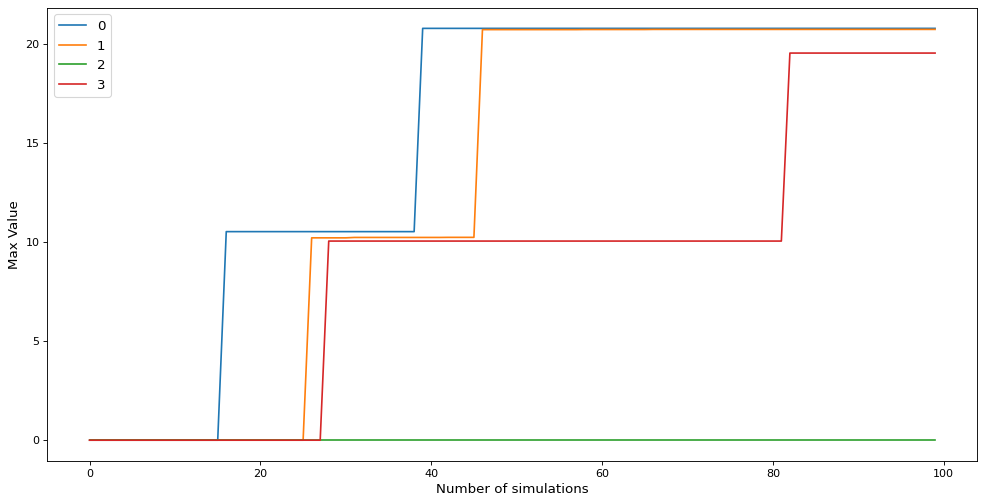

In [12]:
n_seed=3
budgets = 100
end_num = 0
algo = "bai_perturb"
perturb_final_level_1_values = []
perturb_final_level_2_values = []
perturb_final_pnp_all_joint_paths = []
for seed in range(1, n_seed+1):
    filename = f'benchmark1_result/benchmark1_test_algo({algo})_budget({budgets})_seed({seed})_{end_num}.npy'
    with open(filename,'rb') as f:
        data_for_seed = np.load(f, allow_pickle=True)
        # print(list(data_for_seed.keys()))
        perturb_final_level_1_values.append(data_for_seed['level_1_values'])
        perturb_final_level_2_values.append(data_for_seed['level_2_values'])
        perturb_final_pnp_all_joint_paths.append(data_for_seed['pnp_all_joint_paths'])
perturb_final_level_1_values = np.asarray(perturb_final_level_1_values)
perturb_final_level_2_values = np.asarray(perturb_final_level_2_values)
perturb_final_pnp_all_joint_paths = np.asarray(perturb_final_pnp_all_joint_paths)
perturb_final_level_2_values[np.isinf(perturb_final_level_2_values)]=0.
perturb_avg_final_level_2_values = np.mean(perturb_final_level_2_values, axis=0)
perturb_std_final_level_2_values = np.std(perturb_final_level_2_values, axis=0)
fig, ax = p_utils.init_2d_figure("test")
for idx, perturb_avg_final_level_2_value in enumerate(perturb_avg_final_level_2_values):
    print(perturb_avg_final_level_2_value)
    p_utils.plot_values(
        ax,
        perturb_avg_final_level_2_value,
        label=str(idx),
        title="Benchamrk1_Level_1",
        save_dir_name='benchmark1_result',
        is_save=False)

In [23]:
test = np.max(perturb_avg_final_level_2_values[:, -1])
print(test)

20.789495666666667
